# Dataset exploration

We will first load the dataset with mne. Then we will use them with nilearn or sklearn

In [27]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image
import mne

# Fonction pour charger les fichiers fMRI
def load_fmri_data(dataset_path, subjects, sessions):
    fmri_images = []
    for subj in subjects:
        for sess in sessions:
            fmri_path = os.path.join(dataset_path, subj, 'func', f'{subj}_{sess}_bold.nii.gz')
            if os.path.exists(fmri_path):
                fmri_img = nib.load(fmri_path)
                fmri_images.append(fmri_img)
            else:
                print(f"File {fmri_path} not found.")
    return fmri_images

# Fonction pour visualiser une image 4D
def visualize_4d_fmri(fmri_img):
    # Sélectionner la première image temporelle pour la visualisation
    first_volume = image.index_img(fmri_img, 0)
    plotting.plot_epi(first_volume)
    plt.show()

########## Main ###########
# Définir le chemin de base vers les données
dataset_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/'

# Liste des sujets à charger
# subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08', 'sub-09']
# for i in range(10, 34):
#     subjects.append(f'sub-{i:02d}')
subjects = ['sub-01']

# Liste des sessions
sessions = [f'task-rest_run-{i}' for i in range(1, 9)] + [f'task-sleep_run-{i}' for i in range(1, 9)]

# Charger les données fMRI
fmri_images = load_fmri_data(dataset_path, subjects, sessions)
print("Number of fmri_images : ", len(fmri_images))

# Visualiser les images fMRI
# for img in fmri_images:
#     visualize_4d_fmri(img)



File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-rest_run-3_bold.nii.gz not found.
File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-rest_run-4_bold.nii.gz not found.
File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-rest_run-5_bold.nii.gz not found.
File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-rest_run-6_bold.nii.gz not found.
File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-rest_run-7_bold.nii.gz not found.
File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-rest_run-8_bold.nii.gz not found.
File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-sleep_run-4_bold.nii.gz not found.
File /home/r

### Lire le fichier tsv pour savoir quand on dors 

/tmp/ipykernel_93035/2485566638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)


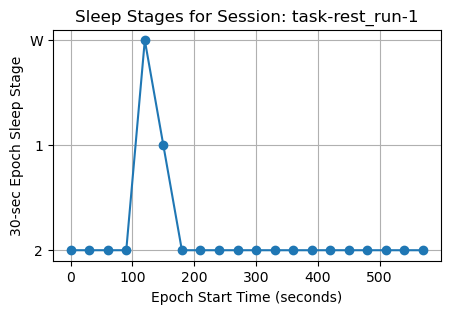

/tmp/ipykernel_93035/2485566638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)


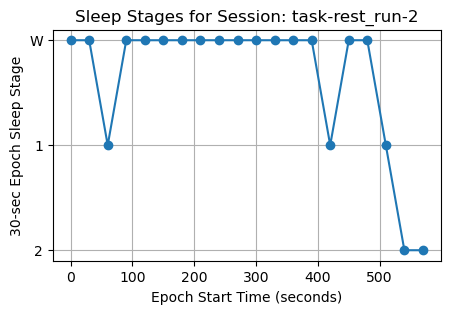

No data available for session: task-rest_run-3
No data available for session: task-rest_run-4
No data available for session: task-rest_run-5
No data available for session: task-rest_run-6
No data available for session: task-rest_run-7
No data available for session: task-rest_run-8


/tmp/ipykernel_93035/2485566638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)


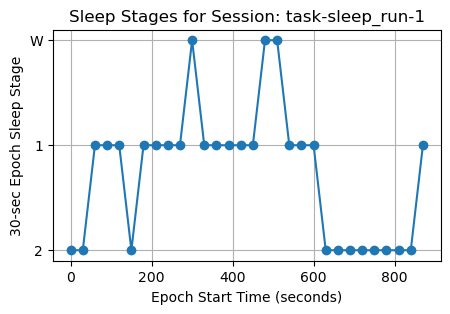

/tmp/ipykernel_93035/2485566638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)


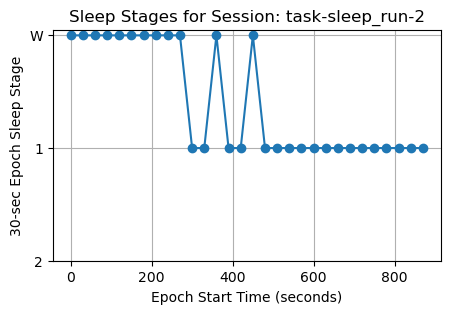

/tmp/ipykernel_93035/2485566638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)


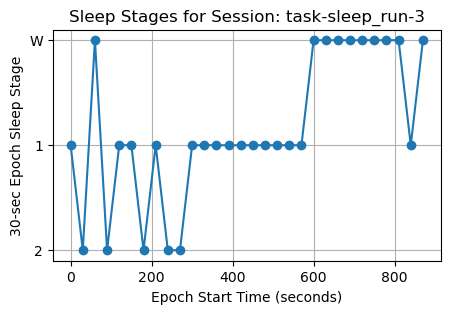

No data available for session: task-sleep_run-4
No data available for session: task-sleep_run-5
No data available for session: task-sleep_run-6
No data available for session: task-sleep_run-7
No data available for session: task-sleep_run-8


In [31]:
import pandas as pd

# Numero du sujet a plot
subj = 'sub-01'

# Chemin vers le fichier TSV
tsv_file = os.path.join(dataset_path, 'sourcedata',f'{subj}-sleep-stage.tsv')

# Lire le fichier TSV avec pandas
sleep_data = pd.read_csv(tsv_file, sep='\t')

for session in sessions:
    session_data = sleep_data[sleep_data['session'] == session]

    if not session_data.empty:
        # Mapper les stades de sommeil à des valeurs numériques
        stage_mapping = {'W': 2, '1': 1, '2': 0}
        session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)

        # Tracer 30-sec_epoch_sleep_stage en fonction de epoch_start_time_sec
        plt.figure(figsize=(5, 3))
        plt.plot(session_data['epoch_start_time_sec'], session_data['sleep_stage_mapped'], marker='o', linestyle='-')
        plt.yticks([2, 1, 0], ['W', '1', '2'])  # Définir les labels de l'axe y
        plt.xlabel('Epoch Start Time (seconds)')
        plt.ylabel('30-sec Epoch Sleep Stage')
        plt.title(f'Sleep Stages for Session: {session}')
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for session: {session}")

## Data normalisation

/home/rduchadeau/miniconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


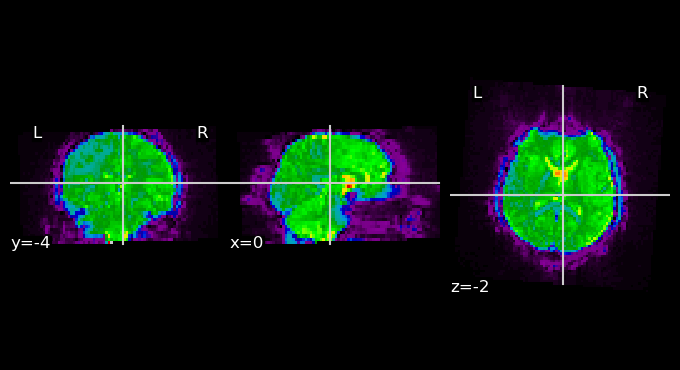

/home/rduchadeau/miniconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


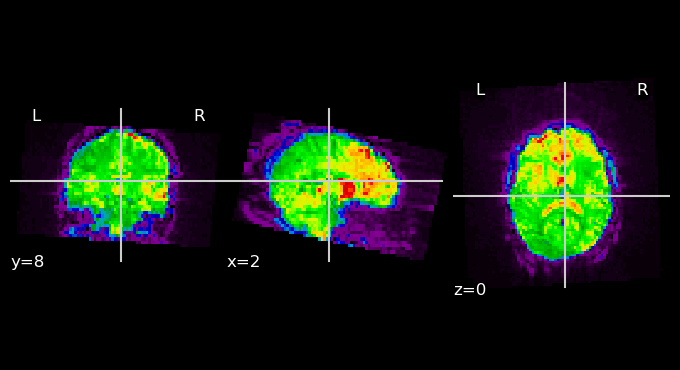

In [51]:
# Fonction pour visualiser une image 4D
def visualize_4d_fmri(fmri_img):
    # Sélectionner la première image temporelle pour la visualisation
    first_volume = image.index_img(fmri_img, 0)
    plotting.plot_epi(first_volume)
    plt.show()
    

visualize_4d_fmri(fmri_images[0])
visualize_4d_fmri(fmri_images[5])

Here, it's clear that the images are not oriented the same. That could be a problem to deal with.

    fmri_data = fmri_img.get_fdata() extrait les intensités des voxels de l'image fMRI, permettant une manipulation et une analyse ultérieures de ces données.


## Fixing temporal resolution

First, what is the problem ?

In [35]:
import os
import nibabel as nib
import pandas as pd

# Définir les chemins
dataset_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/'
subject = 'sub-01'
session = 'task-rest_run-1'  # Exemple de session, à remplacer par la session souhaitée

# Charger les données fMRI
fmri_path = os.path.join(dataset_path, subject, 'func', f'{subject}_{session}_bold.nii.gz')
if os.path.exists(fmri_path):
    fmri_img = nib.load(fmri_path)
    fmri_data = fmri_img.get_fdata()
    num_volumes = fmri_data.shape[-1]  # Nombre de volumes
    header = fmri_img.header
    tr = header.get_zooms()[-1]  # Temps de répétition (TR)
    acquisition_time = num_volumes * tr  # Temps total d'acquisition
    print(f'Nombre de volumes d\'IRM pour {subject} {session}: {num_volumes}')
    print(f'Temps d\'acquisition pour {subject} {session}: {acquisition_time:.2f} secondes')
else:
    print(f'File {fmri_path} not found.')

# Charger les données de sommeil
tsv_file = os.path.join(dataset_path, 'sourcedata', f'{subject}-sleep-stage.tsv')
if os.path.exists(tsv_file):
    sleep_data = pd.read_csv(tsv_file, sep='\t')
    session_data = sleep_data[sleep_data['session'] == session]
    num_labels = len(session_data)
    total_label_time = num_labels * 30  # 30 secondes par label
    print(f'Nombre total de labels pour {subject} {session}: {num_labels}')
    print(f'Temps total d\'acquisition des labels pour {subject} {session}: {total_label_time} secondes')
else:
    print(f'File {tsv_file} not found.')


Nombre de volumes d'IRM pour sub-01 task-rest_run-1: 286
Temps d'acquisition pour sub-01 task-rest_run-1: 600.60 secondes
Nombre total de labels pour sub-01 task-rest_run-1: 20
Temps total d'acquisition des labels pour sub-01 task-rest_run-1: 600 secondes


On voit sur cet exemple de code que la résolution temporelle entre les label et les images fmri n'est pas la même. C'est un problème pour notre étude.Règlons cela

In [ ]:
# Numero du sujet a plot
subj = 'sub-01'

# Initialiser les listes pour les caractéristiques et les étiquettes
all_features = []
all_labels = []
fmri_images = []
stage_mapping = {'W': 0, '1': 1, '2': 1, '3': 1}  # 0 pour éveil, 1 pour sommeil
session_data = session_data.copy()

for subj in subjects:
    print("subjects = ", subj)
    # Charger les données de sommeil
    tsv_file = os.path.join(dataset_path, 'sourcedata', f'{subj}-sleep-stage.tsv')
    
    # Si le fichier existe (ce qui est tjs le cas normalement)
    if os.path.exists(tsv_file):
        sleep_data = pd.read_csv(tsv_file, sep='\t')
        
        for sess in sessions:
            # Filtrer les données pour la session actuelle
            session_data_copy = sleep_data[sleep_data['session'] == sess].copy()
            print("\n\n************ session = ", sess)
            
            # Si la session existe pour ce sujet
            if not session_data_copy.empty:            
                
                ###### Extaction des features ######
                fmri_path = os.path.join(dataset_path, subj, 'func', f'{subj}_{sess}_bold.nii.gz')
                if os.path.exists(fmri_path):
                    fmri_img = nib.load(fmri_path)
                    fmri_images.append(fmri_img)
                else:
                    print(f"File {fmri_path} not found.")
                    continue
                    
                fmri_data = fmri_img.get_fdata()
                print("***** nombre de fmri_data : ", len(fmri_data))
                
                num_timepoints = fmri_data.shape[-1]  # nombre de points temporels
                print("num_timepoints : ", num_timepoints)
                
                # Calculer la moyenne des voxels pour chaque tranche temporelle
                features = [fmri_data[..., i].mean() for i in range(num_timepoints)]
                print("nombre de features : ", len(features))
                
                ###### Extraction des labels ######
                # Mapper les stades de sommeil à des valeurs numériques
                session_data_copy.loc[:, 'sleep_stage_mapped'] = session_data_copy['30-sec_epoch_sleep_stage'].map(stage_mapping)                
                # Étendre les labels pour correspondre aux points temporels
                tr = fmri_img.header.get_zooms()[-1]  # Utiliser le TR réel de l'acquisition fMRI
                interval = int(30 / tr)
                extended_labels = np.repeat(session_data_copy['sleep_stage_mapped'].values, interval)
                
                # Si les labels étendus sont plus longs que les points temporels, les tronquer
                if len(extended_labels) > num_timepoints:
                    extended_labels = extended_labels[:num_timepoints]
                # Si les labels étendus sont plus courts que les points temporels, les répéter
                elif len(extended_labels) < num_timepoints:
                    extended_labels = np.pad(extended_labels, (0, num_timepoints - len(extended_labels)), 'edge')
                
                # print("***** Labels : ", extended_labels)
                print("nombre de Labels : ", len(extended_labels))
                
                # Vérification qu'il y a le même nombre de feature que de label
                if len(features) == len(extended_labels):
                    all_features.append(features)
                    all_labels.append(extended_labels)
                else:
                    print(f"Mismatch in feature and label length for {subj} {sess}: {len(features)} features, {len(labels)} labels")
                
                all_features.append(features)
                all_labels.append(extended_labels)
                
            else:
                print(f"No data available for session: {sess}")
        
    else:
        print(f"File {tsv_file} not found.")

# Convertir les listes en tableaux numpy
all_features = np.concatenate(all_features)
all_labels = np.concatenate(all_labels)

print(f"Total features: {all_features.shape}")
print(f"Total labels: {all_labels.shape}")

Now, we have the same number of features than labels. Let's try to plot simultaniously the features and the label : 

In [ ]:
# Visualisation
fig, ax1 = plt.subplots(figsize=(12, 6))

# Tracer les caractéristiques (features)
color = 'tab:blue'
ax1.set_xlabel('Temps (secondes)')
ax1.set_ylabel('Features', color=color)
ax1.plot(all_features, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Créer un second axe y qui partage le même axe x
ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('Labels', color=color)  
ax2.plot(all_labels, color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Pour éviter le chevauchement des labels des axes
plt.title('Visualisation des caractéristiques et des étiquettes sur toute la durée d\'acquisition')
plt.show()

Dans la suite on va considérer que : 
- Si deux états successifs sont de sommeil, on peut considérer que le patient a dormi pendant toute la durée des 30 secondes.
- Si un état de sommeil est suivi d'un état de réveil, on peut considérer que le patient a dormi pendant la moitié de cette période.

Nombre de volumes d'IRM pour sub-04 task-rest_run-1: 286
Temps d'acquisition pour sub-04 task-rest_run-1: 600.60 secondes
Nombre total de labels pour sub-04 task-rest_run-1: 20
Temps total d'acquisition des labels pour sub-04 task-rest_run-1: 600 secondes
Labels discrets : [0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0]


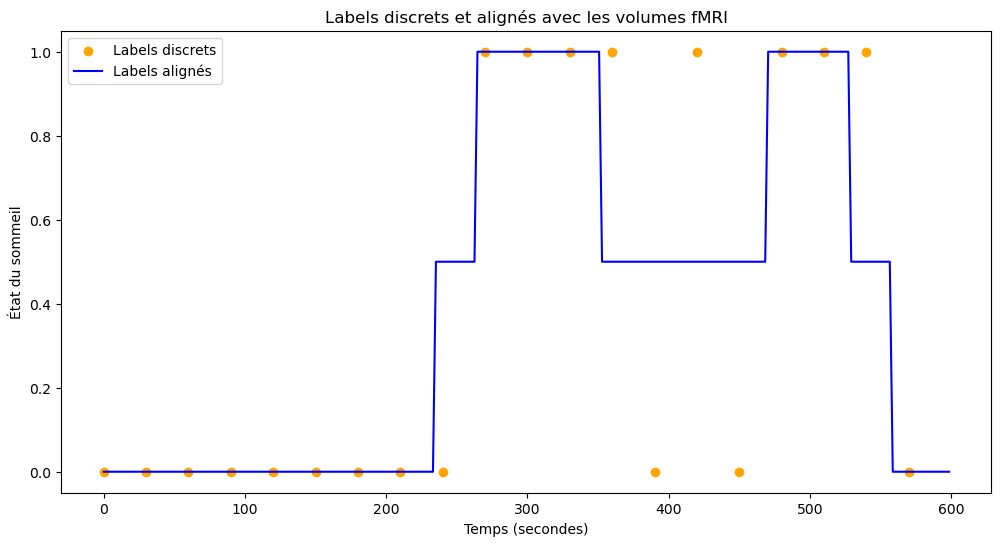

In [45]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Définir les chemins
dataset_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/'
subject = 'sub-04'
session = 'task-rest_run-1'  # Exemple de session

# Charger les données fMRI
fmri_path = os.path.join(dataset_path, subject, 'func', f'{subject}_{session}_bold.nii.gz')
if os.path.exists(fmri_path):
    fmri_img = nib.load(fmri_path)
    fmri_data = fmri_img.get_fdata()
    num_volumes = fmri_data.shape[-1]
    header = fmri_img.header
    tr = header.get_zooms()[-1]  # Temps de répétition (TR)
    acquisition_time = num_volumes * tr
    print(f'Nombre de volumes d\'IRM pour {subject} {session}: {num_volumes}')
    print(f'Temps d\'acquisition pour {subject} {session}: {acquisition_time:.2f} secondes')
else:
    print(f'File {fmri_path} not found.')

# Charger les données de sommeil
tsv_file = os.path.join(dataset_path, 'sourcedata', f'{subject}-sleep-stage.tsv')
if os.path.exists(tsv_file):
    sleep_data = pd.read_csv(tsv_file, sep='\t')
    session_data = sleep_data[sleep_data['session'] == session]
    num_labels = len(session_data)
    total_label_time = num_labels * 30  # 30 secondes par label
    print(f'Nombre total de labels pour {subject} {session}: {num_labels}')
    print(f'Temps total d\'acquisition des labels pour {subject} {session}: {total_label_time} secondes')
else:
    print(f'File {tsv_file} not found.')

# Afficher les labels discrets
discrete_labels = session_data['30-sec_epoch_sleep_stage'].map({'W': 0, '1': 1, '2': 1, '3': 1}).values
print(f'Labels discrets : {discrete_labels}')

# Créer un vecteur de temps pour les labels discrets
time_discrete_labels = np.arange(0, total_label_time, 30)

# Assigner les labels aux volumes fMRI
labels = np.zeros(num_volumes)
interval = int(30 / tr)  # Nombre de volumes par tranche de 30 secondes

for i in range(num_labels):
    start_idx = i * interval
    end_idx = start_idx + interval
    
    if i < num_labels - 1:
        current_stage = session_data.iloc[i]['30-sec_epoch_sleep_stage']
        next_stage = session_data.iloc[i+1]['30-sec_epoch_sleep_stage']
        
        if current_stage in ['1', '2', '3'] and next_stage in ['1', '2', '3']:
            labels[start_idx:end_idx] = 1  # Sommeil pour toute la période
        elif current_stage in ['1', '2', '3'] and next_stage == 'W':
            labels[start_idx:end_idx] = 0.5  # Sommeil pour la moitié de la période
        elif current_stage == 'W' and next_stage in ['1', '2', '3']:
            labels[start_idx:end_idx] = 0.5  # Sommeil pour la moitié de la période
        else:
            labels[start_idx:end_idx] = 0  # Éveil pour toute la période
    else:
        current_stage = session_data.iloc[i]['30-sec_epoch_sleep_stage']
        if current_stage in ['1', '2', '3']:
            labels[start_idx:end_idx] = 1  # Sommeil pour toute la période
        else:
            labels[start_idx:end_idx] = 0  # Éveil pour toute la période

# Créer un vecteur de temps pour les volumes fMRI
time_fmri = np.arange(0, acquisition_time, tr)

# Visualiser les labels discrets et alignés avec les volumes fMRI sur le même graphique
plt.figure(figsize=(12, 6))
plt.scatter(time_discrete_labels, discrete_labels, label='Labels discrets', color='orange', marker='o')
plt.plot(time_fmri, labels, label='Labels alignés', color='blue')
plt.xlabel('Temps (secondes)')
plt.ylabel('État du sommeil')
plt.title('Labels discrets et alignés avec les volumes fMRI')
plt.legend()
plt.show()

## Other tests

One other waye pf plotting fmri images

In [ ]:
from nilearn.plotting import view_img

# Since our fmri_img is a 4D NiftiImage, we need to generate a 3D one.
# One way of doing that is averaging our volumes on the time axis 
# with the mean_img function.
from nilearn.image.image import mean_img

fmri_img_mean = mean_img(fmri_images[0])
view_img(fmri_img_mean)

In [4]:
# Obtenir les données de l'image fMRI lissée
fmri_data = fmri_images.get_fdata()

# Calculer la moyenne des voxels pour chaque tranche temporelle
features = fmri_data.mean(axis=(0, 1, 2))

for subj in subjects:
    for sess in sessions:
        tsv_file  = os.path.join(dataset_path, 'sourcedata', f'{subj}-sleep-stage.tsv')
        sleep_data = pd.read_csv(tsv_file, sep='\t')

        # Mapper les stades de sommeil à des valeurs numériques
        stage_mapping = {'W': 0, '1': 1, '2': 1, '3': 1}  # 0 pour éveil, 1 pour sommeil
        sleep_data['sleep_stage_mapped'] = sleep_data['30-sec_epoch_sleep_stage'].map(stage_mapping)

        # Associer les caractéristiques aux étiquettes de sommeil
        labels =   sleep_data['sleep_stage_mapped'].values

AttributeError: 'list' object has no attribute 'get_fdata'

### Normalisation and smoothing

Avant normalisation :



/home/rduchadeau/miniconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


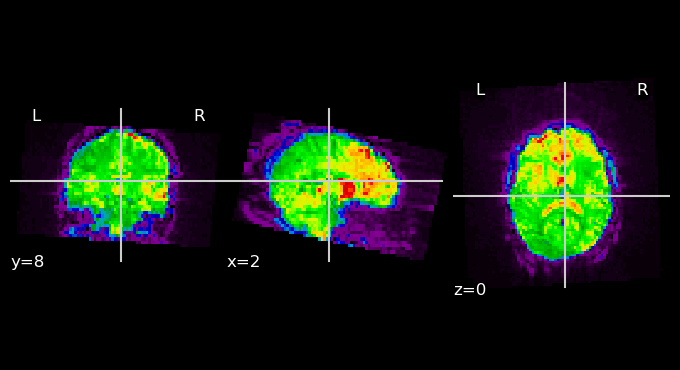

: 

In [3]:
from nilearn.image import resample_img, smooth_img

def visualize_4d_fmri(fmri_img):
    # Sélectionner la première image temporelle pour la visualisation
    first_volume = image.index_img(fmri_img, 0)
    plotting.plot_epi(first_volume)
    plt.show()
    
print("Avant normalisation :\n")
visualize_4d_fmri(fmri_images[5])
# Exemple de normalisation
fmri_img_normalized = resample_img(fmri_images, target_affine=np.eye(3) * 3, interpolation='continuous')

# Lissage des images pour réduire le bruit
fmri_img_smoothed = smooth_img(fmri_img_normalized, fwhm=6)

print("Après normalisation :\n")
visualize_4d_fmri(fmri_img_smoothed[5])

### Test exploitation json

/home/rduchadeau/miniconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


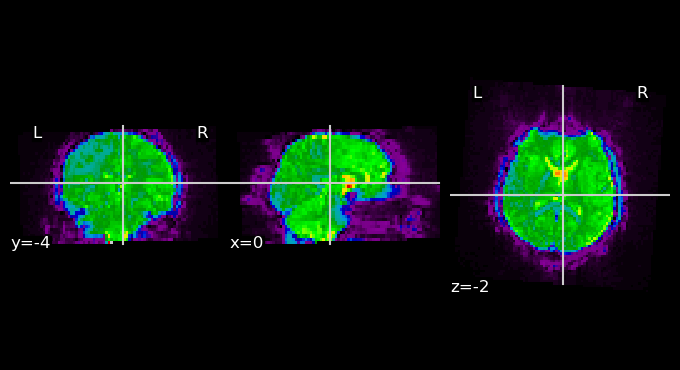

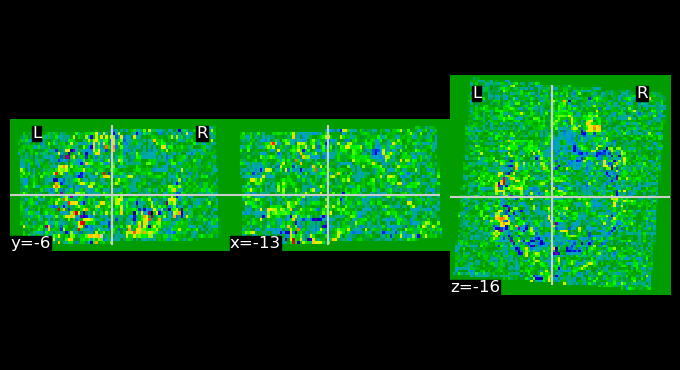

In [49]:
import json

# Charger les métadonnées JSON
json_file = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-rest_run-1_bold.json'
with open(json_file, 'r') as f:
    metadata = json.load(f)

# Charger les données fMRI
fmri_file = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-rest_run-1_bold.nii.gz'
fmri_img = nib.load(fmri_file)

# Visualisation de l'image
first_volume = image.index_img(fmri_img, 0)
plotting.plot_epi(first_volume)
plt.show()

# Extraire les temps de répétition et de synchronisation des tranches
tr = metadata['RepetitionTime']
slice_timing = metadata['SliceTiming']

# Correction du timing des tranches
fmri_img_corrected = image.clean_img(fmri_img, t_r=tr, slice_time_ref=0.5, standardize=True)

# Visualisation de l'image
first_volume = image.index_img(fmri_img_corrected, 0)
plotting.plot_epi(first_volume)
plt.show()


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Extraire les caractéristiques des données fMRI (par exemple, utiliser la moyenne des voxels)
fmri_data = fmri_images.get_fdata()
mean_fmri = fmri_data.mean(axis=3).ravel()  # Prendre la moyenne temporelle et aplatir en 1D

# Associer les caractéristiques fMRI aux stades de sommeil
X = mean_fmri.reshape(-1, 1)  # Caractéristiques (1D pour simplification)
y = session_data['sleep_stage_mapped'].values  # Labels

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle de Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prédire les stades de sommeil sur l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluer les performances du modèle
print(classification_report(y_test, y_pred))

NameError: name 'fmri_img' is not defined